# LE-NET 을 이용한 교통표지판 인식

# STEP 0: PROBLEM STATEMENT

- 교통 표지판 이미지를 학습을 통해, 이 표지판을 분류하는 딥 뉴럴 네트워크를 만드는 것이 목표입니다.
- 43개 종류의 교통 표지판 사용
- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')

- Yann LeCun 교수의 Le-Net 파일


http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf


# STEP 1: IMPORT LIBRARIES AND DATASET

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import libraries 
import pickle
# 확장자 p로 끝나는 파일을 읽으려면 pickle 모듈이 있어야 함
import seaborn as sns
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  
import random

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/data-vision/day18')

## 피클을 이용해서, 다음 세개의 파일을 읽어온다. 

파일 다운로드 : https://drive.google.com/file/d/1RFZVIK32bmQnZsKrPBlxAwvYl4NexApB/view?usp=sharing

train.p 

valid.p

test.p

In [ ]:
# 피클 파일 읽기

In [6]:
with open('train.p', mode = 'rb', ) as training_data:  # training_data 로 읽어서 
  train = pickle.load(training_data) # pickle로 로드

In [ ]:
train # 딕셔너리 형태로 되어 있고 다시 피클로 저장할 수 있다

In [7]:
 with open('valid.p', mode = 'rb', ) as valid_data:
  validation = pickle.load(valid_data)

In [8]:
  with open('test.p', mode = 'rb', ) as test_data:
    test = pickle.load(test_data)

In [14]:
# key값 확인하기
train.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [9]:
# labels의 키는 y_train으로 저장
y_train = train['labels']

In [10]:
# features 키는 X_train 저장
X_train = train['features']

In [11]:
y_val = validation['labels']

In [12]:
X_val = validation['features']

In [13]:
y_test = test['labels']

In [14]:
X_test = test['features']

In [35]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [ ]:
# X_train[0]째부터 보면 같은 이미지가 계속 되어 지는 게 보임
# 이미지 증강을 한 것

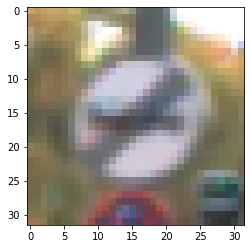

In [48]:
plt.imshow(X_train[100])
plt.show()

In [36]:
y_train[0]

41

### 트레이닝셋, 밸리데이션셋, 테스트셋을 변수처리한다.



# STEP 2: IMAGE EXPLORATION

# STEP 3: DATA PEPARATION

In [15]:

from sklearn.utils import shuffle
# random 사용안해도 shuffle 모듈로 할 수 있다


In [16]:
X_train, y_train = shuffle(X_train, y_train)
# X_train의 정답이 Y_train이 정답인데 X_train만 섞어버리면 답이 없다
# shuffle은 X,y 모두 믹스해준다

In [54]:
#랜덤으로 순서가 바뀐 이미지
y_train[0]  #3번은 speed limit 60

3

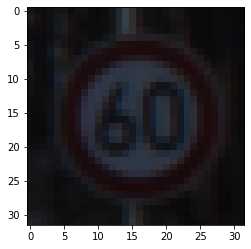

In [55]:
plt.imshow(X_train[0])

In [57]:
X_train.shape
# 4차원이므로 32*32개의 rgb로 3개인데 --> 여기에서 하나의 색이 그레이스케일 하나의 행렬로 됨

(34799, 32, 32, 3)

In [17]:
X_train_gray = np.sum(X_train / 3, axis = 3, keepdims = True)
# X_train에는 
# r 0-255 행렬
# g 0-255 행렬
# b 0-255 행렬
# 이 각각 있는데 이를 각각 3으로 나눔 
# 만약 각 255가 있었다고 가정하면 3으로 나눠서 85로 바뀌게 되면 다시 sum을 하면 255가 되므로 
# 하나의 이미지로 됨 (행렬 하나로 바뀜)

# 또 여기에 keepdims 은 4차원인것을 4차원으로 유지하라는 파라미터

In [18]:
X_test_gray = np.sum(X_test / 3, axis=3, keepdims=True)

In [19]:
X_val_gray = np.sum(X_val / 3, axis=3, keepdims=True)

In [61]:
X_train_gray.shape 
# grb에서 1 --> gray scale

(34799, 32, 32, 1)

feature scaling

In [ ]:
# -1과 1사이로 만들어 주는 feature scaling 방법
(X_train - 128) / 128

# 가장 큰 값을 넣으면 255 --> 0.99가 됨
# 가장 작은 값은 넣으면 0 --> -1이 됨

In [20]:
X_train_gray_norm = (X_train_gray - 128) / 128
X_test_gray_norm = (X_test_gray - 128) / 128
X_val_gray_norm = (X_val_gray - 128) / 128

# STEP 4: MODEL TRAINING

르넷은 논문에 다음처럼 되어있다. 따라서 다음처럼 실제로 모델링을 해보자

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6 (필터는 6개를 사용)
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6
  -풀링은 반으로 줄었으니 2x2, 그리고 average pooling 사용
  플랫튼을 하면 400으로 들어오게 됨

    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [21]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split


In [22]:
model = Sequential()

In [23]:
model.add ( Conv2D( 6, (5,5), activation='relu', input_shape=(32, 32, 1) ) )

In [24]:
model.add ( AveragePooling2D()) # pool_size=(2, 2) 디폴트 파라미터가 되어 있기 때문에 생략가능
# AveragePooling2D은 2 x 2 로 pooling 하면서 평균값으로 뽑음, 
# 그에반해 MaxPooling은 최대값을 뽑음
# 참고로 MinPooling은 최소값을 뽑음

In [25]:
model.add ( Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))

In [26]:
model.add ( AveragePooling2D() )

In [27]:
model.add (Flatten() )

In [28]:
model.add (Dense(120, activation='relu'))

In [29]:
model.add (Dense(84, activation='relu') )

In [30]:
model.add (Dense(43, activation='softmax'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [32]:
model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

In [33]:
history = model.fit(
    X_train_gray_norm,
    y_train, batch_size= 500,
    epochs= 50, 
    validation_data= (X_val_gray_norm, y_val )
)

Epoch 1/50
70/70 [==============================] - 33s 13ms/step - loss: 3.4767 - accuracy: 0.0962 - val_loss: 2.8435 - val_accuracy: 0.2744
Epoch 2/50
70/70 [==============================] - 0s 6ms/step - loss: 2.1317 - accuracy: 0.4299 - val_loss: 1.5409 - val_accuracy: 0.5408
Epoch 3/50
70/70 [==============================] - 0s 6ms/step - loss: 1.0206 - accuracy: 0.7038 - val_loss: 1.0620 - val_accuracy: 0.6871
Epoch 4/50
70/70 [==============================] - 0s 6ms/step - loss: 0.6864 - accuracy: 0.8051 - val_loss: 0.8325 - val_accuracy: 0.7649
Epoch 5/50
70/70 [==============================] - 0s 6ms/step - loss: 0.5106 - accuracy: 0.8604 - val_loss: 0.7855 - val_accuracy: 0.7814
Epoch 6/50
70/70 [==============================] - 0s 5ms/step - loss: 0.4322 - accuracy: 0.8802 - val_loss: 0.7397 - val_accuracy: 0.7859
Epoch 7/50
70/70 [==============================] - 0s 6ms/step - loss: 0.3497 - accuracy: 0.9049 - val_loss: 0.6859 - val_accuracy: 0.8084
Epoch 8/50
70/70 [

# STEP 5: MODEL EVALUATION

In [34]:
import matplotlib.pyplot as plt

In [35]:
def learning_curve(history, epoch):
  #정확도 차트 (accuracy)
  # x축을 epoch_range로 셋팅
  epoch_range = np.arange(1, epoch +1)

  plt.figure(figsize=(16,8))
  plt.subplot(1, 2, 1)
  
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuraycy')
  plt.legend([ 'Train', 'Val' ] )
  # plt.show() // 차트를 따로 그리려면 위의 subplot()을 제거
   # 오차 차트 (loss) 
  plt.subplot(1, 2, 2) 

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.xlabel('Epoch')
  plt.ylabel('loss')
  plt.legend([ 'Train', 'Val' ] )
  plt.show()

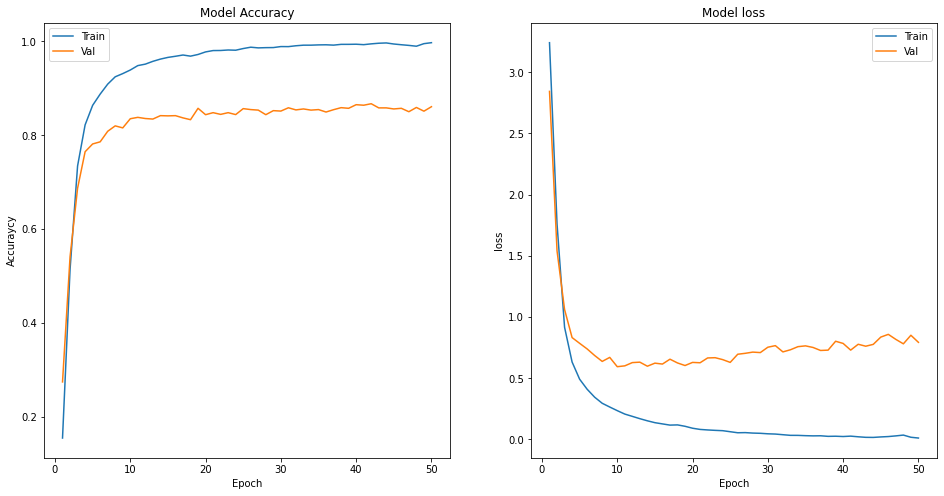

In [36]:
learning_curve(history, 50)

In [39]:
y_pred = model.predict(X_test_gray_norm)

In [40]:
y_pred.shape

(12630, 43)

In [41]:
y_pred
# 43개 중에 가장 확률이 높은 요소를 찾아야 함 argmax()

array([[0.0000000e+00, 3.0248805e-32, 0.0000000e+00, ..., 1.0619711e-16,
        6.3821661e-16, 2.4872694e-24],
       [3.1895477e-06, 9.9999678e-01, 1.0756785e-10, ..., 4.1488928e-21,
        3.1696672e-29, 9.7308615e-32],
       [7.1345383e-36, 1.9427998e-32, 0.0000000e+00, ..., 0.0000000e+00,
        1.1012503e-24, 0.0000000e+00],
       ...,
       [3.6434105e-06, 8.3214539e-04, 2.4301798e-06, ..., 4.6755412e-12,
        1.7133360e-05, 6.8405541e-08],
       [4.8568559e-11, 7.2294421e-04, 7.3382937e-05, ..., 8.3679637e-08,
        1.7634903e-08, 3.2032851e-08],
       [1.8068160e-19, 1.1896077e-07, 2.5622239e-03, ..., 8.3531268e-06,
        3.5561547e-17, 5.2545964e-16]], dtype=float32)

In [44]:
# 컴퓨전 매트릭스를 그리기 위해서는 argmax로 구해야함
y_pred = y_pred.argmax(axis=1 )

In [45]:
y_pred

array([16,  1, 38, ...,  3,  7, 10])

In [43]:
y_test

array([16,  1, 38, ...,  6,  7, 10], dtype=uint8)

In [ ]:
#위의 둘의 결과가 이래야 비교할 수 있게 됨 
# y_pred와 y_test

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [47]:
cm = confusion_matrix(y_test, y_pred)

In [48]:
cm

array([[ 21,  39,   0, ...,   0,   0,   0],
       [  7, 689,  12, ...,   0,   0,   0],
       [  0,  54, 659, ...,   1,   0,   0],
       ...,
       [  0,   1,   1, ...,  51,   0,   0],
       [  0,   0,   0, ...,   0,  50,   0],
       [  0,   0,   0, ...,   0,  16,  60]])

In [50]:
accuracy_score(y_test, y_pred)

0.8701504354711006

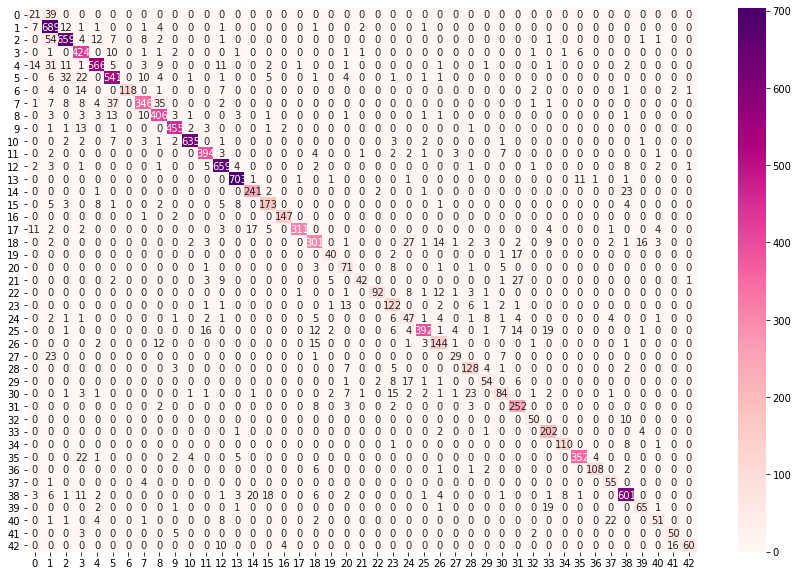

In [49]:
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, fmt='.0f', cmap='RdPu')
plt.show()